<a href="https://colab.research.google.com/github/SubashiniB181203/Time-Series-Analysis-Lab/blob/main/221501145_TSA_exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***6. Implement program to apply moving average smoothing for data preparation and time series forecasting.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def simple_moving_average(data, window):
    return data.rolling(window=window).mean()

In [3]:
def exponential_moving_average(data, span):
    return data.ewm(span=span, adjust=False).mean()

In [4]:
def plot_moving_averages(data, sma, ema, window_size, span_value): # Added window_size and span_value as arguments
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Original Data', linestyle='dashed', alpha=0.7)
    plt.plot(sma, label=f'Simple MA (window={window_size})', linewidth=2) # Use window_size instead of sma.window
    plt.plot(ema, label=f'Exponential MA (span={span_value})', linewidth=2)  # Use span_value instead of ema.span
    plt.legend()
    plt.title("Moving Average Smoothing")
    plt.show()

<ipython-input-6-8f23d37aea26>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward-fill missing values


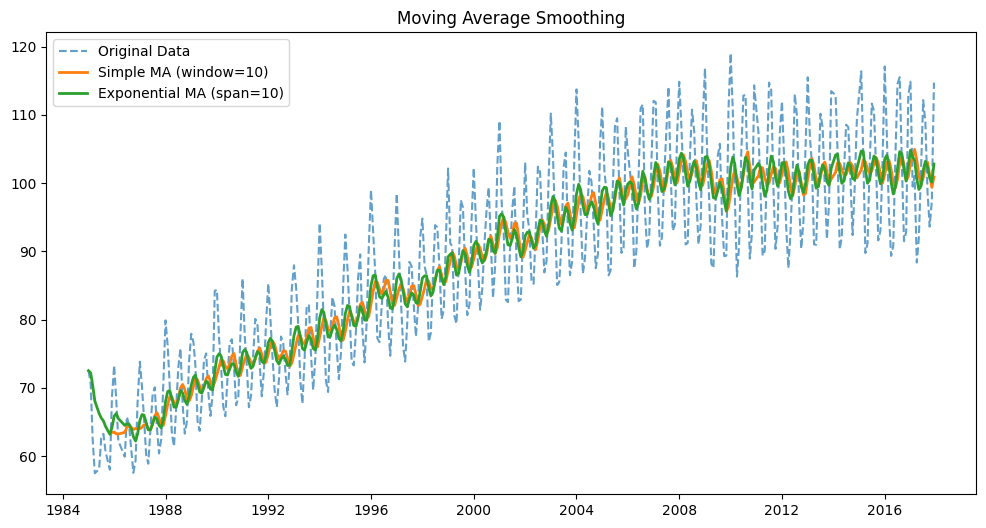

In [6]:
if __name__ == "__main__":
    # Load dataset
    file_path = "/content/sample_data/time_series_data.csv"  # Update with your actual file path
    df = pd.read_csv(file_path, parse_dates=True, index_col=0)  # Assuming first column is date/time
    column_name = "IPG2211A2N"  # Replace with the column containing numerical data

    data = df[column_name]

    # Data Preparation
    data = data.fillna(method='ffill')  # Forward-fill missing values
    data = data.dropna()  # Drop remaining NaN values
    data = data[(data > data.quantile(0.01)) & (data < data.quantile(0.99))]  # Remove outliers

    window_size = 10
    span_value = 10

    sma = simple_moving_average(data, window_size)
    ema = exponential_moving_average(data, span_value)

    plot_moving_averages(data, sma, ema, window_size, span_value)